<a href="https://colab.research.google.com/github/zaephaer/MLU-11-Titanic-EnsembleML/blob/main/Titanic_01_DecisionTree_with_BaggingML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bagging Machine Learning Algorithm

In [48]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/zaephaer/MLU-11-Titanic-EnsembleML/main/titanic_dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
df.shape

(891, 12)

## Focus only 3 feature of Pclass, Sex and Age

In [50]:
# Looking at Pclass feature
df['Pclass'].unique()
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

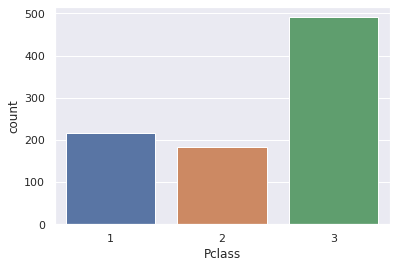

In [51]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="Pclass", data=df)

In [52]:
# Looking at Sex feature
df['Sex'].unique()
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

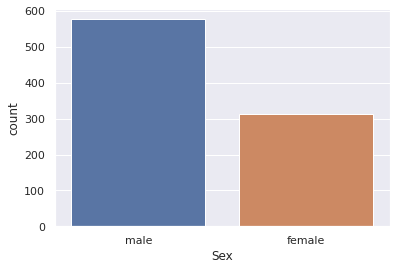

In [53]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Sex", data=df)

In [54]:
# Looking at Sex feature
df['Age'].unique()
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

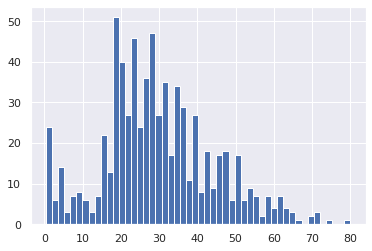

In [55]:
df['Age'].hist(bins=50);

In [56]:
# Looking at Survived target
df['Survived'].unique()
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

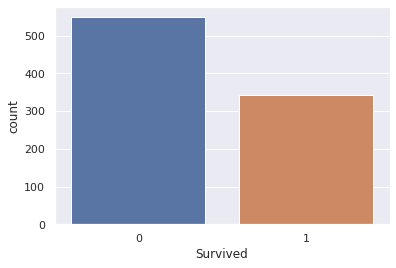

In [57]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Survived", data=df)

# Data Pre-processing

In [58]:
# Temporarily store feature and target dataset
subset = df[['Pclass', 'Sex', 'Age', 'Survived']].copy()

# Dropping row with 'Null' value
subset.dropna(inplace=True)

# Assigning Features
X = subset[['Pclass', 'Sex', 'Age']].copy()
X.head()

,Pclass,Sex,Age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0


In [59]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Using Label Encoder to transform categorical data
X['Sex'] = le.fit_transform(subset['Sex'])

# Looking back at X after transform 'Sex'
X.head()

,Pclass,Sex,Age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0


In [60]:
X.shape

(714, 3)

In [61]:
X.describe()

,Pclass,Sex,Age
count,714.000000,714.000000,714.000000
mean,2.236695,0.634454,29.699118
std,0.838250,0.481921,14.526497
min,1.000000,0.000000,0.420000
25%,1.000000,0.000000,20.125000
50%,2.000000,1.000000,28.000000
75%,3.000000,1.000000,38.000000
max,3.000000,1.000000,80.000000


In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  714 non-null    int64  
 1   Sex     714 non-null    int64  
 2   Age     714 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 22.3 KB


In [63]:
# Assigning Target
y = subset['Survived'].copy()
print(y.value_counts())
print("Total: ", y.value_counts()[0] + y.value_counts()[1])

0    424
1    290
Name: Survived, dtype: int64
Total:  714


# Modelling

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [65]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score

# Function for printing scoring performance
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    '''
    v0.1 Follow the scikit learn library format in terms of input
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        '''
        training performance
        '''
        res = clf.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, 
                                                                res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, 
                                                                            res)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, 
                                                                  res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), 
                                                      lb.transform(res))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        res_test = clf.predict(X_test)
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, 
                                                                res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, 
                                                                            res_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, 
                                                                  res_test)))   
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), 
                                                      lb.transform(res_test))))

# Decision Tree Algorithm

In [66]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [67]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print("\n********************************\n")
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9118

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       294
           1       0.94      0.83      0.89       205

    accuracy                           0.91       499
   macro avg       0.92      0.90      0.91       499
weighted avg       0.91      0.91      0.91       499


Confusion Matrix: 
 [[284  10]
 [ 34 171]]

ROC AUC: 0.9001

Average Accuracy: 	 0.8116
Accuracy SD: 		 0.0610

********************************

Test Result:

accuracy score: 0.7953

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       130
           1       0.80      0.65      0.71        85

    accuracy                           0.80       215
   macro avg       0.80      0.77      0.78       215
weighted avg       0.80      0.80      0.79       215


Confusion Matrix: 
 [[116  14]
 [ 30  55]]

ROC AUC: 0.7697



# Bagging Algorithm with Out of Bag score = False

In [68]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
  

In [69]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print("\n********************************\n")
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9118

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       294
           1       0.94      0.83      0.89       205

    accuracy                           0.91       499
   macro avg       0.92      0.90      0.91       499
weighted avg       0.91      0.91      0.91       499


Confusion Matrix: 
 [[284  10]
 [ 34 171]]

ROC AUC: 0.9001

Average Accuracy: 	 0.8116
Accuracy SD: 		 0.0610

********************************

Test Result:

accuracy score: 0.7953

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       130
           1       0.80      0.65      0.71        85

    accuracy                           0.80       215
   macro avg       0.80      0.77      0.78       215
weighted avg       0.80      0.80      0.79       215


Confusion Matrix: 
 [[116  14]
 [ 30  55]]

ROC AUC: 0.7697



# Bagging Algorithm with Out of Bag score = True

In [70]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000,
                            bootstrap=True, oob_score=True,
                            n_jobs=-1, random_state=42)

In [71]:
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.7935871743486974

In [72]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print("\n********************************\n")
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9118

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       294
           1       0.94      0.83      0.89       205

    accuracy                           0.91       499
   macro avg       0.92      0.90      0.91       499
weighted avg       0.91      0.91      0.91       499


Confusion Matrix: 
 [[284  10]
 [ 34 171]]

ROC AUC: 0.9001

Average Accuracy: 	 0.8116
Accuracy SD: 		 0.0610

********************************

Test Result:

accuracy score: 0.7953

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       130
           1       0.80      0.65      0.71        85

    accuracy                           0.80       215
   macro avg       0.80      0.77      0.78       215
weighted avg       0.80      0.80      0.79       215


Confusion Matrix: 
 [[116  14]
 [ 30  55]]

ROC AUC: 0.7697

